In [30]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats


In [25]:
batches = ['a']#,'c','e', 'k', 'n']
df = pd.DataFrame()
for letter in batches:
    filename = '../../outputs/'+letter+'_5-20-2021_12.csv'
    df_partial = pd.read_csv(filename)
    #df_partial = df_partial[~df_partial.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs
    df = pd.concat([df, df_partial], ignore_index=True)
print(df)

      model_num  test_acc  test_loss  train_acc  train_loss     g_gap  \
0           100  0.828167   0.508187    0.84468    0.449833 -0.016513   
1         10000  0.849400   0.454937    0.87338    0.372544 -0.023980   
2         10005  0.858600   0.408366    0.89090    0.319956 -0.032300   
3         10017  0.861250   0.419448    0.88968    0.324949 -0.028430   
4         10029  0.870800   0.391067    0.90010    0.294216 -0.029300   
...         ...       ...        ...        ...         ...       ...   
2429       9939  0.853600   0.435557    0.88144    0.348514 -0.027840   
2430       9954  0.862300   0.410230    0.89004    0.322052 -0.027740   
2431       9966  0.867750   0.394441    0.89935    0.295550 -0.031600   
2432       9972  0.869750   0.386962    0.90111    0.291229 -0.031360   
2433       9991  0.853750   0.436215    0.88099    0.349293 -0.027240   

       mqBE_L1   mqBE_L2   mqBE_L3   mqBE_L4  ...   erBE_L1   erBE_L2  \
0     0.695358  0.709454  0.680353  0.613038  ... 

In [26]:
over_90 = df[df.test_acc > 0]
print(over_90.shape)
print(over_90.columns)

(2434, 26)
Index(['model_num', 'test_acc', 'test_loss', 'train_acc', 'train_loss',
       'g_gap', 'mqBE_L1', 'mqBE_L2', 'mqBE_L3', 'mqBE_L4', 'mqBE_L5',
       'mqAE_L1', 'mqAE_L2', 'mqAE_L3', 'mqAE_L4', 'mqAE_L5', 'erBE_L1',
       'erBE_L2', 'erBE_L3', 'erBE_L4', 'erBE_L5', 'erAE_L1', 'erAE_L2',
       'erAE_L3', 'erAE_L4', 'erAE_L5'],
      dtype='object')


In [31]:
cols = ['mqBE_L1', 'mqBE_L2', 'mqBE_L3', 'mqBE_L4', 'mqBE_L5',
       'mqAE_L1', 'mqAE_L2', 'mqAE_L3', 'mqAE_L4', 'mqAE_L5', 'erBE_L1',
       'erBE_L2', #'erBE_L3'
       'erBE_L4', 'erBE_L5', 'erAE_L1', 'erAE_L2',
       #'erAE_L3',
       'erAE_L4', 'erAE_L5']
test_acc_vec = over_90['test_acc']
train_acc_vec = over_90['train_acc']
gap = train_acc_vec - test_acc_vec
results = {}
results2 = {}

for x in cols:
    print(x)
    col = over_90[x]
    vec = col.to_numpy()
    results[x + "_test"] = abs(stats.pearsonr(vec, test_acc_vec)[0])
    results[x + "_train"] = abs(stats.pearsonr(vec, train_acc_vec)[0])
    results[x + "_gap"] = abs(stats.pearsonr(vec, gap)[0])

    results2[x + "_test"] = abs(stats.spearmanr(vec, test_acc_vec)[0])
    results2[x + "_train"] = abs(stats.spearmanr(vec, train_acc_vec)[0])
    results2[x + "_gap"] = abs(stats.spearmanr(vec, gap)[0])
    

mqBE_L1
mqBE_L2
mqBE_L3
mqBE_L4
mqBE_L5
mqAE_L1
mqAE_L2
mqAE_L3
mqAE_L4
mqAE_L5
erBE_L1
erBE_L2
erBE_L4
erBE_L5
erAE_L1
erAE_L2
erAE_L3
C:\Users\Khalil Damouni\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\stats.py:3929: RuntimeWarning: invalid value encountered in subtract
  xm = x.astype(dtype) - xmean


ValueError: array must not contain infs or NaNs

In [8]:
sorted_values = sorted(results.values()) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in results.keys():
        if results[k] == i:
            sorted_dict[k] = abs(results[k])
            break

sorted_values = sorted(results2.values()) # Sort the values
sorted_dict2 = {}
for i in sorted_values:
    for k in results2.keys():
        if results2[k] == i:
            sorted_dict2[k] = abs(results2[k])
            break

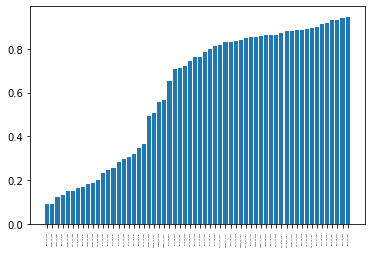

In [9]:
SMALL_SIZE = 2
#matplotlib.rc('font', size=SMALL_SIZE)
matplotlib.rc('ytick', labelsize=10)
matplotlib.rc('xtick', labelsize=SMALL_SIZE)

plt.bar(range(len(sorted_dict2)), list(sorted_dict2.values()), align='center');
plt.xticks(range(len(sorted_dict2)), list(sorted_dict2.keys()),rotation='vertical');

In [31]:
import operator
print(max(results, key=results.get), results[max(results, key=results.get)])
print(max(results2, key=results2.get), results2[max(results2, key=results2.get)])

erBE_L2_train 0.959102759068669
erBE_L2_train 0.9394799301636311


Pearson:  0.8880523757384873
Spearman: 0.8906750868721007


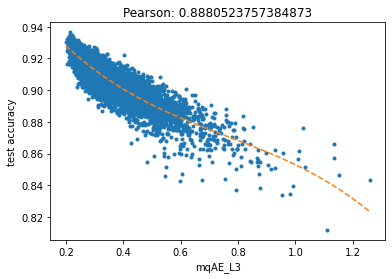

In [21]:
accuracy = "test" #"train", "test"
x_axis = 'mqAE_L3'

xp = np.linspace(min(over_90[x_axis]), max(over_90[x_axis]), 100)
p3 = np.poly1d(np.polyfit(over_90[x_axis], over_90[accuracy+'_acc'], 3))

matplotlib.rc('xtick', labelsize=10)
plt.plot(over_90[x_axis] , over_90[accuracy+'_acc'],
'.', xp, p3(xp),'--')
plt.xlabel(x_axis)
plt.ylabel(accuracy + " accuracy")
plt.title("Pearson: " + str(results[x_axis+'_'+accuracy]))
#plt.ylim([0,1.1])
print("Pearson: ",results[x_axis+'_'+accuracy])
print("Spearman:", results2[x_axis+'_'+accuracy])

Pearson:  -0.7882103565483304
Pearson:  -0.7587695585972223
Spearman: -0.7694100465539239


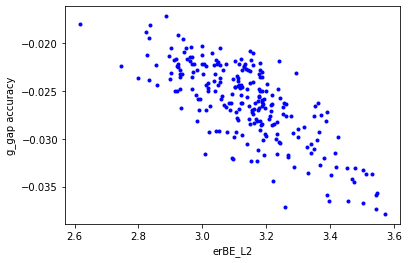

In [37]:
matplotlib.rc('xtick', labelsize=10)
plt.plot(over_90['erBE_L2'] , over_90['g_gap'], '.', color='blue')#over_90[accuracy+'_acc']
plt.xlabel(x_axis)
plt.ylabel(accuracy + " accuracy")
#plt.ylim([0,1.1])
print("Pearson: ", stats.pearsonr(over_90['train_acc'] , over_90['g_gap'])[0])
print("Pearson: ", stats.pearsonr(over_90['erBE_L2'] , over_90['g_gap'])[0])
print("Spearman:", stats.spearmanr(over_90['train_acc'] , over_90['g_gap'])[0])

In [26]:
# Temp Test for 12 epochs
filename = '../../outputs/a_5-20-2021_12.csv'
df = pd.read_csv(filename)
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)] ##Gets rid of infs, NaNs
print(df)

     model_num  test_acc  test_loss  train_acc  train_loss    g_gap   mqBE_L1  \
1        10000   0.84940   0.454937    0.87338    0.372544 -0.02398  0.600811   
6        10056   0.84415   0.460370    0.87343    0.366907 -0.02928  0.607176   
9        10117   0.85525   0.430457    0.88062    0.349655 -0.02537  0.605112   
10       10128   0.84950   0.451064    0.87749    0.358977 -0.02799  0.581047   
14       10294   0.85100   0.436559    0.87949    0.352832 -0.02849  0.581101   
..         ...       ...        ...        ...         ...      ...       ...   
708      18627   0.84765   0.450870    0.88205    0.349151 -0.03440  0.601569   
709      18648   0.85145   0.448171    0.87997    0.353294 -0.02852  0.561350   
743      18945   0.82400   0.511352    0.84773    0.442932 -0.02373  0.642576   
744      18949   0.84590   0.446892    0.87257    0.372236 -0.02667  0.617446   
745      18971   0.84950   0.445915    0.87497    0.365176 -0.02547  0.580211   

      mqBE_L2   mqBE_L3   m